### K-Means Clustering 1
-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Overview of K-Means Clustering

some pictures generated by you...maybe also from the web?

emphasize importance of randomness in the seeds.  maybe show different seeds, and how that impacts things

### Learning Goals
- ...

In [4]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.
import pandas as pd


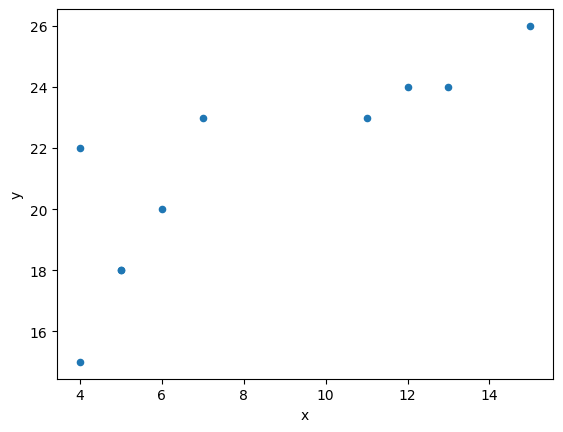

In [2]:
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 23, 18, 15, 24, 26, 18, 24, 23]

df = pd.DataFrame({'x': x, 'y': y})

# scatter plot x and y
ax = df.plot.scatter(x='x', y='y')

note how we can color each point.

c is of same length as x and y

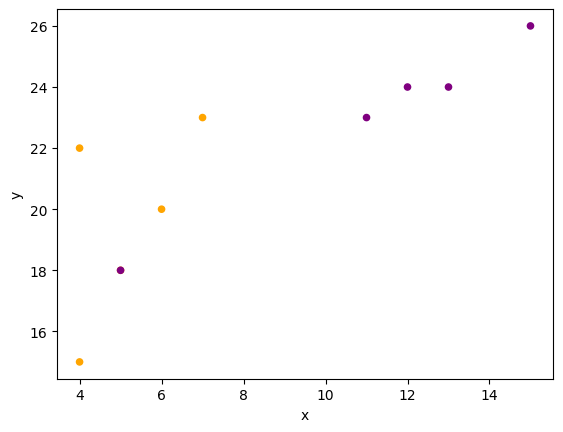

In [3]:
# scatter with color list, showing them how to do that
c = ['orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'purple', 'purple', 'purple']
ax = df.plot.scatter(x='x', y='y', c=c)

But this doesn't look very good, have kmeans give us the color values

look at this, this is the data format that kmeans wants. 
getting the right data format can be tricky
Task:  put data together into a list like this

     print(data) 
     
     [(4, 22), (6, 20), (7, 23), (5, 18), (4, 15), (12, 24), (15, 26), (5, 18), (13, 24), (11, 23)]

get list of (x,y) coordinates


In [4]:
## Solution file Only
#
data = list(zip(x, y))
print(data)

[(4, 22), (6, 20), (7, 23), (5, 18), (4, 15), (12, 24), (15, 26), (5, 18), (13, 24), (11, 23)]


Do a single K-Means experiment

In [5]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
colors = [ 'orange', 'purple', 'olive', 'magenta', 'teal', 'red']

# print label 
print(kmeans.labels_)

[0 0 1 0 0 1 1 0 1 1]


Your output should be either

     [0 0 0 0 0 1 1 0 1 1]

Or

     [1 1 1 1 1 0 0 1 0 0]

So, point 0 is in cluster `kmeans.labels_[0]`.  Point 1 is in cluster `kmeans.labels_[1]`, and so on.   

Overall, this indicates that points 0, 1, 2, 3, 4, and 7 are in the same cluster.  5, 6, 8 and 9 are in the other.

It doesn't matter if `0, 1, 2, 3, 4, and 7` are in cluster 0 and `5, 6, 8 and 9` are in cluster 1.  Or the flip, if `0, 1, 2, 3, 4, and 7` are in cluster 1 and `5, 6, 8 and 9` are in cluster 0.  
- All that matters is that they are in different clusters, because these points form different groupings.


Task.  Need to generate informative plot. Create a list `c` that equals


    ['orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'orange', 'purple', 'purple']
    
Or

    ['purple', 'purple', 'purple', 'purple', 'purple', 'orange', 'orange', 'purple', 'orange', 'orange']

where entry k of the list equals `colors[ kmeans.labels_[k] ]`.  That is  `c[k]` should equal `colors[ kmeans.labels_[k] ]`.


In [6]:
## Solution File Only
#
c = [colors[k] for k in kmeans.labels_]

now do a scater plot with your new `c` list below. 

you should get a picture like

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_scatter.png" width="450">

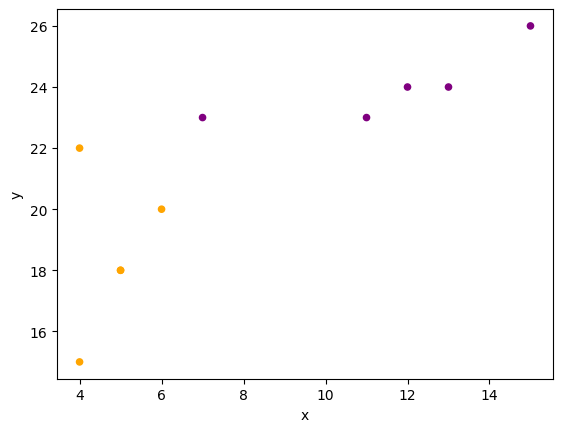

In [7]:
## Solution file only
# 
ax = df.plot.scatter(x='x', y='y', c=c)

each cluster has a center.  lets take a look

In [8]:
centroid0 = kmeans.cluster_centers_[0]
centroid1 = kmeans.cluster_centers_[1]
print(centroid0)


[ 4.8 18.6]



After a scatter plot, you can still put new information in your plot using `ax`.  For instance, to plot centroid 0 in orange, you would do

        ax.plot(centroid0[0], centroid0[1], 'x', c='orange')
        
Task: Insert code in below cell to do both a scatter plot, and plot where centroids
 - Plot centroid 0 in orange
 - Plot centroid 1 in purple
       
You should get a picture like 
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_scatter_w_centroid.png" width="450">

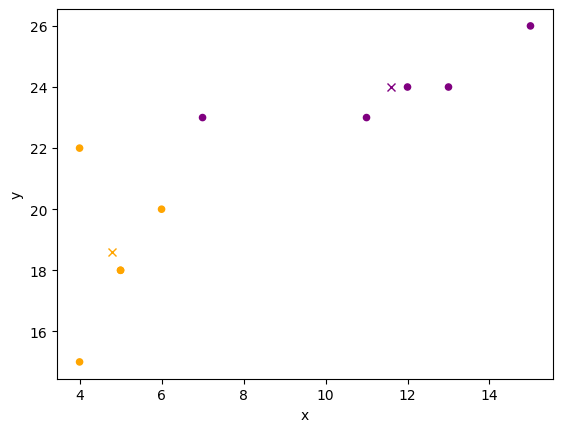

In [9]:
## Solution file only
# 
ax = df.plot.scatter(x='x', y='y', c=c)
ax.plot(centroid0[0], centroid0[1], 'x', c='orange')
ax.plot(centroid1[0], centroid1[1], 'x', c='purple')

Explain inertia.  Its the sum of the distance between every point in a cluster and the centroid

What do you think a good value for inertia is for a cluster?  Large or small?

What happens if we go from 2 clusters to 3 clusters and inertia doesn't change much?

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia2.png" width="450">

Small inertias

We didn't need cluster 3


Task: convert inertias to a dataframe and generate a plot that looks like this
- Make sure to give title and xlabel and ylabel

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia1.png" width="450">



In [10]:
## Ignore warnings, we're just exploring

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[Text(0.5, 1.0, 'K-Means Inertia'),
 Text(0.5, 0, 'Number of Clusters'),
 Text(0, 0.5, 'Inertia')]

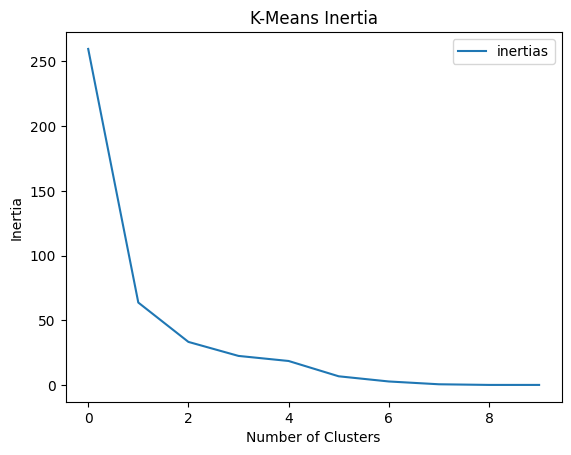

In [11]:
## Solution file only
#
df_inertia = pd.DataFrame({'inertias': inertias})
ax = df_inertia.plot(kind='line', style=['-'])
ax.set(title="K-Means Inertia", xlabel="Number of Clusters", ylabel="Inertia" )


In [ ]:
# House cleaning part 1
from urllib.request import urlretrieve
(file, message) = urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv', 'Wholesale_customer_data.csv')
print("You downloaded the file " + file)    


### Originally from 
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view?usp=sharing

Question here is to predict the Loan_Status depending on the Gender, marital status, the income of the customers, etc.  
- The ultimate goal would be a K-Means approach to grouping a new applicant. Which centroid are they closest to?
    - The people with loans, or without?
    - Make loan decision based on this.

1. Upload loan_clustering.csv to your git repo for easy downloading

2. Task: cluster and choose right number of clusters
 - You do in the solution, too
     - You need to check that the clusters are largely the same Y or N regarding the loan answer
 - Task for them is to figure this out on their own



3. You'll have to find a pattern in the clusters
--> Maybe instead scatter plot just one of the categories (with arange as the x-axis) and then color as before based on cluster
--> Maybe y-axis is Loan Y or N
--> Just do this to answer the above question graphically




K-Means project idea is then extensions of this...or of the below (move over to Latex)
- write multi-d distance function to predict new applicant
- more quanitatively measure how good your Y / N classification is.  Give percent correct metric for your clusters
- discuss more on the ethics of such an algorithm


In [2]:
# House cleaning part 1
from urllib.request import urlretrieve
(file, message) = urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv', 'Wholesale_customer_data.csv')
print("You downloaded the file " + file)    

You downloaded the file Wholesale_customer_data.csv


### Project idea...

Download your own version, give credit to 
   https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv
        
   clean out channel, 
   spell delicatessen, rename Fresh Produce, Milk, Other Groceries, Frozen Food, Detergent and Paper Goods, Delicatessen

Tell them to scale it like, take code from, 
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/  

Task: cluster and choose right number of clusters
 - You do in the solution, too

You'll have to find a pattern in the clusters, 
==> Maybe  scatter plot just one of the categories (with arange as the x-axis) and then color as before based on cluster
==> are incomes, or co-income, or marital status, predictive of a cluster?



In [5]:
data=pd.read_csv("Wholesale_customer_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Discussion template

Quantitative Information:  information represented numerically, i.e., represented with numbers.  This can include  anything that can be measured or counted to that it has a numerical value. https://www.nnlm.gov/guides/data-glossary/quantitative-data
    - The data that you use K-Means with is quantative data

Quantitative Models: models that help us understand and interpret our numerical (quantitative) data.  K-Means is a quantitative model.


1. Communication/Representation of Quantitative Information
    - Plot your data before and after K-Means
    - Possibly print your data to the screen, too, so that the reader knows what the data looks like in raw form

2. Application of Quantitative Models
    - Describe the model used (K-Means)
    - What is K-means.  How does K-Means work?  
    - What do we use K-Means for?  To quantitatively analyze data.
    - Plot your data after K-Means to show the application of the model
      - Possibly plot for various numbers of clusters
      - Show and discuss elbow plot
      - Show that you've explored the model


3. Conclusion -- Quantative Analysis
    - Discuss your scatter plots and any other results.  What did you find? 
    - What can you conclude?  
    - What is still unexplained? 
    - You are communicating and representing quantitative information
    
4. Ethical Reasoning
    - Now that you've seen how an actual algorithm for grouping people works, and how an algorithm might make decisions about people, it's time to consider the ethics of that. 
    
    - What are your thoughts regarding the use of algorithms to group people (e.g., for targeted marketing, or for loans, or other purposes)?
    
    - When is it ethical, when is it not?  What conditions would you like to see? 
    
    - There is no wrong answer here. 
    


Here are a few links to discussion on this issue from New Mexico, but there are many other articles on online on these topics. You're welcome to read / watch the below, or not.

  - https://www.santafe.edu/research/projects/algorithmic-justice
    
  - Video featuring UNM CS Professor Melanie Moses  https://www.youtube.com/watch?v=atVfp_zkkv4

  - https://www.sfreporter.com/news/2018/09/19/algorithms-and-ethics/
    


### In particular, here you want to focus on these questions
-  Insert specific things about this...


Discussion goes here

### Homework Submission Instructions

### The homework submission instructions are different this week. 

### Download your notebook as an ".ipynb" file, and upload the ipynb file as your assignment to Canvas.

### Do not upload a .py file

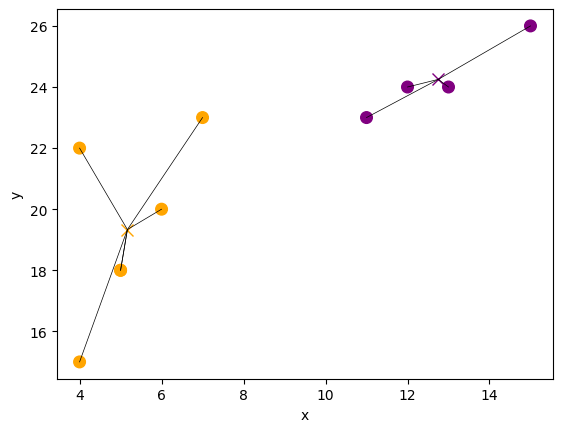

In [12]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.
import pandas as pd

##########

# complete the basic clustering
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 23, 18, 15, 24, 26, 18, 24, 23]

data = list(zip(x, y))
df = pd.DataFrame({'x': x, 'y': y})

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

###########

colors = [ 'orange', 'purple', 'olive', 'magenta', 'teal', 'red']
c = [colors[k] for k in kmeans.labels_]

centroid0 = kmeans.cluster_centers_[0]
centroid1 = kmeans.cluster_centers_[1]

ax = df.plot.scatter(x='x', y='y', c=c, s=70)
ax.plot(centroid0[0], centroid0[1], 'x', c='orange', ms=8)
ax.plot(centroid1[0], centroid1[1], 'x', c='purple', ms=8)

# plot line between centroid and cluster
for (x1,y1,cluster) in zip(x,y,kmeans.labels_):
    ax.plot([x1, kmeans.cluster_centers_[cluster,0]],  [y1, kmeans.cluster_centers_[cluster,1]], '-k', linewidth=0.5)
